In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from xgboost import plot_importance

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.filterwarnings('ignore')

## Load Dataset and Rearrange Columns

In [2]:
import pandas as pd
df = pd.read_excel('../input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')
df = df.loc[:,['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage',  'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Personal Loan']]

# Remove ID column
df = df.iloc[:,1:14]
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


##  Plotting of Variables

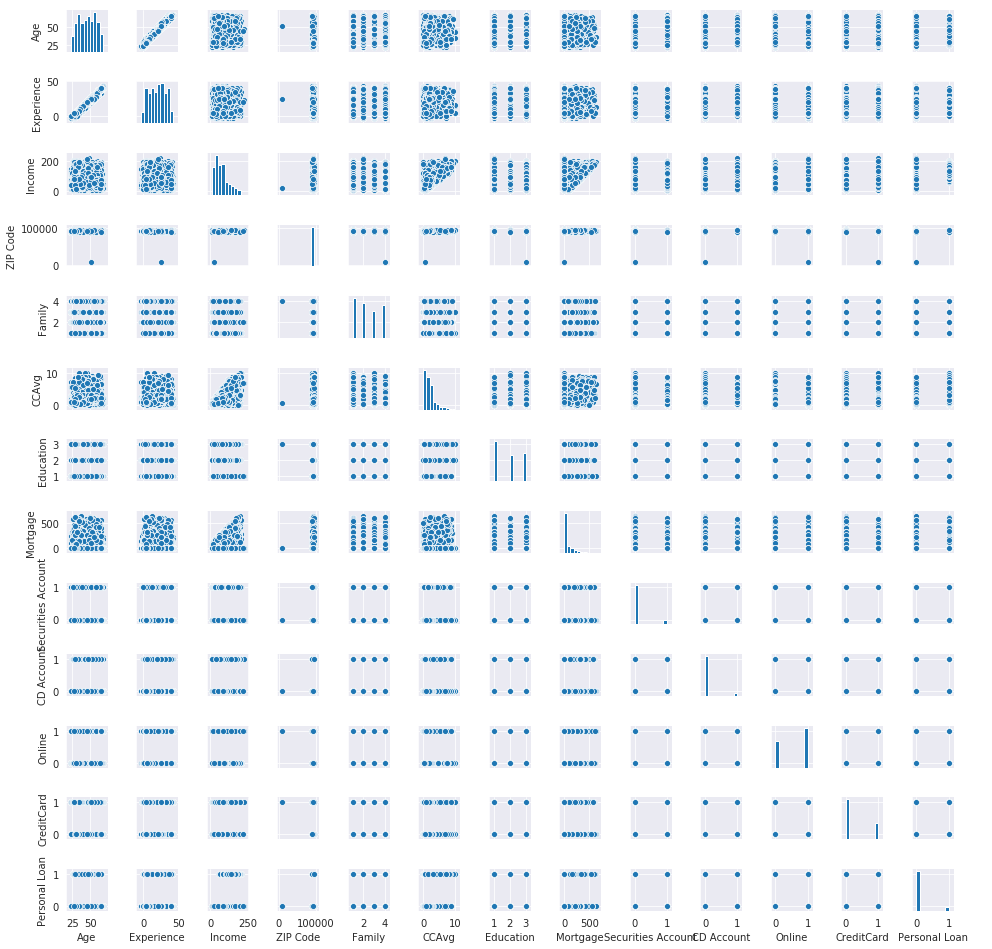

In [3]:
sns.set_style('darkgrid')
sns.pairplot(df, height=1)
#...scale Income and CCAvg later

## Create ZIP2 Column 

Text(0.5, 1.0, 'Count of First Two Digits of ZIP Code')

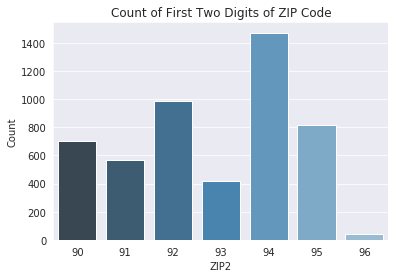

In [4]:
df['ZIP2'] = df['ZIP Code'].astype(str).str[0:2]
sns.set_style('darkgrid')
sns.countplot(x = 'ZIP2', data = df, palette = 'Blues_d')
plt.ylabel('Count')
plt.title('Count of First Two Digits of ZIP Code')


# # Rearrange cols
# df = df.loc[:,['Age', 'Experience', 'Income', 'Family', 'CCAvg',
#        'Education', 'Mortgage',  'Securities Account',
#        'CD Account', 'Online', 'CreditCard', 'ZIP2', 'Personal Loan']]
# df

In [5]:
#Remove ZIP Code and rearrange cols
df.drop(columns=['ZIP Code'], inplace=True)

df = df.loc[:,['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'ZIP2','Personal Loan']]
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,ZIP2,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,91,0
1,45,19,34,3,1.5,1,0,1,0,0,0,90,0
2,39,15,11,1,1.0,1,0,0,0,0,0,94,0
3,35,9,100,1,2.7,2,0,0,0,0,0,94,0
4,35,8,45,4,1.0,2,0,0,0,0,1,91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,92,0
4996,30,4,15,4,0.4,1,85,0,0,1,0,92,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,93,0
4998,65,40,49,3,0.5,2,0,0,0,1,0,90,0


## Creat Train and Test Split (Unscaled)

In [6]:
x = df.iloc[:,0:12]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=7)
x

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,ZIP2
0,25,1,49,4,1.6,1,0,1,0,0,0,91
1,45,19,34,3,1.5,1,0,1,0,0,0,90
2,39,15,11,1,1.0,1,0,0,0,0,0,94
3,35,9,100,1,2.7,2,0,0,0,0,0,94
4,35,8,45,4,1.0,2,0,0,0,0,1,91
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,92
4996,30,4,15,4,0.4,1,85,0,0,1,0,92
4997,63,39,24,2,0.3,3,0,0,0,0,0,93
4998,65,40,49,3,0.5,2,0,0,0,1,0,90


## Compare Algorithms on Unscaled Data (Baseline)

In [7]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=1000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('CART',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                             solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(alg

In [8]:
my_cv = []
my_names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=7)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    my_names.append(name)
    my_cv.append(cv)
    msg = ('%s %f (%f)' % (name, cv.mean(), cv.std()))
    print(msg)
    #...CART has the highest acccuracy at 98.2%

LR 0.953000 (0.013454)
CART 0.983000 (0.013454)
LDA 0.939000 (0.021656)
KNN 0.886000 (0.033526)
SVC 0.902000 (0.004000)


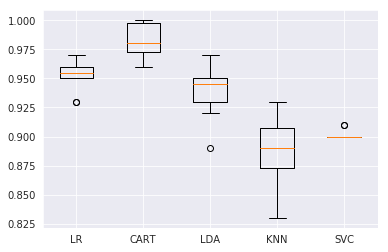

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(my_cv)
ax.set_xticklabels(my_names)
plt.show()

## Compare Algorithms on Scaled Data (Baseline)

In [10]:
cols = ['Income','CCAvg']
cols2 = ['Age', 'Experience', 'Family', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'ZIP2', 'Personal Loan']

foo = df.loc[:,['Income','CCAvg']]
scaler = StandardScaler().fit(foo)

foo = pd.DataFrame(scaler.transform(foo))
foo.columns = ['Income','CCAvg']

df_scaled = pd.concat([foo, df.loc[:,cols2]], axis=1)
df_scaled = df_scaled.loc[:,all_cols]
df_scaled = df_scaled.loc[:,['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard','ZIP2','Personal Loan']]
df_scaled

NameError: name 'all_cols' is not defined

## Create Train and Test Split on Scaled Data 

In [11]:
x = df_scaled.iloc[:,0:12]
y = df_scaled.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=7)


## Compare Algorithms on Scaled Data 

In [12]:
my_cv = []
my_names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=7)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    my_names.append(name)
    my_cv.append(cv)
    msg = ('%s %f (%f)' % (name, cv.mean(), cv.std()))
    print(msg)
    #... CART slightly increased to 98.40%

LR 0.951000 (0.015133)
CART 0.983000 (0.012689)
LDA 0.939000 (0.021656)
KNN 0.910000 (0.011832)
SVC 0.902000 (0.004000)


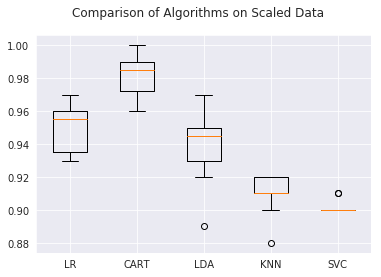

In [13]:
fig = plt.figure()
fig.suptitle('Comparison of Algorithms on Scaled Data')
ax = fig.add_subplot(111)
plt.boxplot(my_cv)
ax.set_xticklabels(my_names)
plt.show()

## Tune Decision Tree Classifer on Scaled Data

In [14]:
# c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
# kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
# param_grid = dict(C=c_values, kernel=kernel_values)

parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}

#Note: x_train data that was used is scaled
model = DecisionTreeClassifier()
kfold = StratifiedKFold(n_splits = 10, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=kfold)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with %r' % (mean, stdev, param))
#...accuracy is at 98.3% with max_depth=3, min_saples_split=70

Best: 0.983000 using {'max_depth': 3, 'min_samples_split': 70}
0.902000 (0.004000) with {'max_depth': 1, 'min_samples_split': 10}
0.902000 (0.004000) with {'max_depth': 1, 'min_samples_split': 30}
0.902000 (0.004000) with {'max_depth': 1, 'min_samples_split': 50}
0.902000 (0.004000) with {'max_depth': 1, 'min_samples_split': 70}
0.902000 (0.004000) with {'max_depth': 1, 'min_samples_split': 90}
0.902000 (0.004000) with {'max_depth': 1, 'min_samples_split': 110}
0.902000 (0.004000) with {'max_depth': 1, 'min_samples_split': 130}
0.902000 (0.004000) with {'max_depth': 1, 'min_samples_split': 150}
0.902000 (0.004000) with {'max_depth': 1, 'min_samples_split': 170}
0.902000 (0.004000) with {'max_depth': 1, 'min_samples_split': 190}
0.902000 (0.004000) with {'max_depth': 1, 'min_samples_split': 210}
0.902000 (0.004000) with {'max_depth': 1, 'min_samples_split': 230}
0.902000 (0.004000) with {'max_depth': 1, 'min_samples_split': 250}
0.902000 (0.004000) with {'max_depth': 1, 'min_samples_spl

## Ensemble Methods

In [15]:
ensembles = []
ensembles.append(('Ada', AdaBoostClassifier()))
ensembles.append(('GB', GradientBoostingClassifier()))
ensembles.append(('BC', BaggingClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
ensembles

[('Ada',
  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                     n_estimators=50, random_state=None)),
 ('GB',
  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                             learning_rate=0.1, loss='deviance', max_depth=3,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators=100,
                             n_iter_no_change=None, presort='deprecated',
                             random_state=None, subsample=1.0, tol=0.0001,
                             validation_fraction=0.1, verbose=0,
                             warm_start=False)),
 ('BC',
  BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                    max_features

## Compare Ensemble Methods on Scaled Data 

In [16]:
my_cv = []
my_names = []

for name, model in ensembles:
    kfold = StratifiedKFold(n_splits=10, random_state=7)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    my_names.append(name)
    my_cv.append(cv)
    msg = ('%s %f (%f)' % (name, cv.mean(), cv.std()))
    print(msg)

#...GB has the highest at 98.6%

Ada 0.960000 (0.017321)
GB 0.985000 (0.012042)
BC 0.983000 (0.010050)
ET 0.971000 (0.014457)


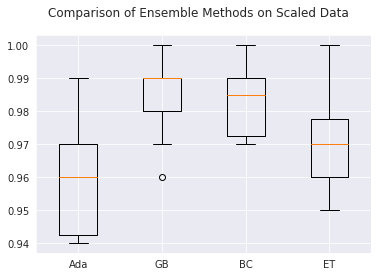

In [17]:
fig = plt.figure()
fig.suptitle('Comparison of Ensemble Methods on Scaled Data')
ax = fig.add_subplot(111)
plt.boxplot(my_cv)
ax.set_xticklabels(my_names)
plt.show()

## Predict Using GradientBoosing 

In [18]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

# note that x_test was already scaled
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

pd.set_option('precision',5)
print(model.feature_importances_*10)
print(x_test.columns)
#...model accuracy is 97.9%
#...top predictors are Income, Education, and Family)

0.979
[[3584   34]
 [  50  332]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3618
           1       0.91      0.87      0.89       382

    accuracy                           0.98      4000
   macro avg       0.95      0.93      0.94      4000
weighted avg       0.98      0.98      0.98      4000

[4.23381041e+00 4.95782730e-01 1.65978871e-01 1.40781387e-01
 1.56257466e+00 3.28761896e+00 8.49205586e-03 6.48434317e-05
 6.49748102e-03 8.92911234e-02 3.79931643e-04 8.72754660e-03]
Index(['Income', 'CCAvg', 'Age', 'Experience', 'Family', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'ZIP2'],
      dtype='object')
